## Exploratory Data Analysis (EDA)
# Project: House Price Prediction - ML Pipeline
## Purpose:
### - Understand dataset structure
### - Identify missing values
### - Analyze feature distributions
### - Study relationship between features and house price


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [3]:
# NOTE:
# Dataset will be loaded from data/raw/ in upcoming steps
# Example:
# df = pd.read_csv("data/raw/house_prices.csv")


In [4]:
# Load training dataset
train_path = "../data/raw/train.csv"
df = pd.read_csv(train_path)

df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print("Dataset shape:", df.shape)
df.info()


Dataset shape: (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nu

In [6]:
df["SalePrice"].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

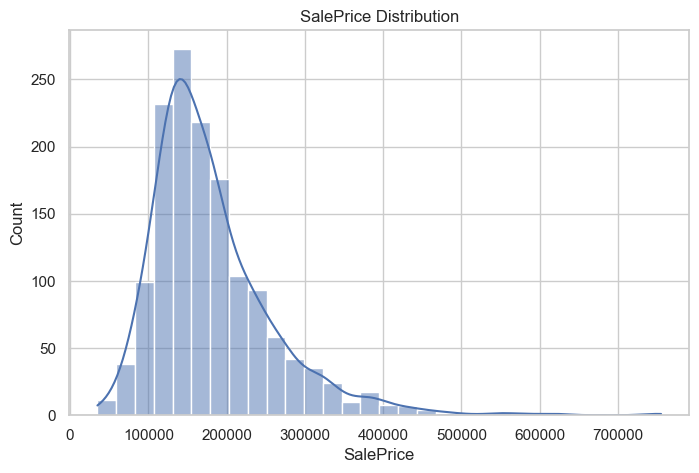

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df["SalePrice"], bins=30, kde=True)
plt.title("SalePrice Distribution")
plt.show()


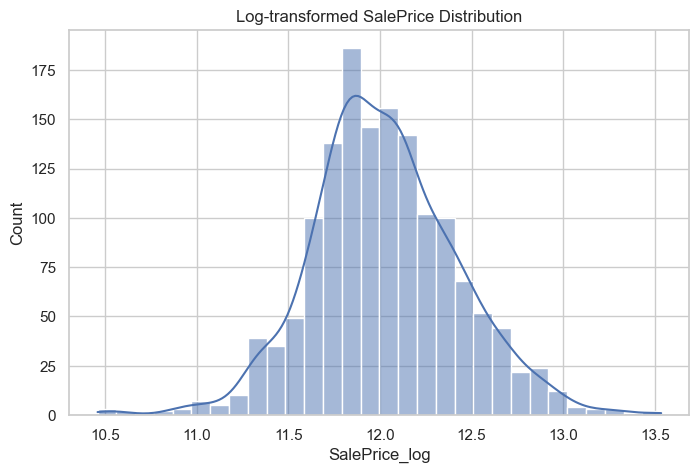

In [8]:
df["SalePrice_log"] = np.log1p(df["SalePrice"])

plt.figure(figsize=(8,5))
sns.histplot(df["SalePrice_log"], bins=30, kde=True)
plt.title("Log-transformed SalePrice Distribution")
plt.show()


In [9]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

missing.head(10)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
dtype: int64

## Missing Value Analysis

We categorize missing values into:
1. Missing because feature does not exist (structural missing)
2. Missing due to data collection issues


In [10]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

### Structural Missing Values (feature not present)

Some features are missing because many houses do not have that feature.

Examples:
- PoolQC, Alley, Fence, FireplaceQu
- Garage-related features
- Basement-related features

Decision:
- Treat missing values as a separate category ("None")
- Missing value itself carries information


### Missing due to measurement / data issues

Some features are missing even though the feature exists.

Examples:
- LotFrontage
- Electrical
- MasVnrArea

Decision:
- LotFrontage: fill using neighborhood median
- Electrical: fill with mode
- MasVnrArea: fill with median


All missing value handling will be implemented in preprocessing (src/data_preprocessing.py).


In [12]:
num_features = df.select_dtypes(include=['int64', 'float64']).columns
cat_features = df.select_dtypes(include=['object']).columns

print("Numerical:", len(num_features))
print("Categorical:", len(cat_features))


Numerical: 39
Categorical: 43


### Feature Type Overview

The dataset contains a mix of numerical and categorical features.
Several numerical features show skewness, while many categorical
features represent the presence or absence of property components.

All feature transformations will be handled in the preprocessing
pipeline to keep this notebook focused on analysis.


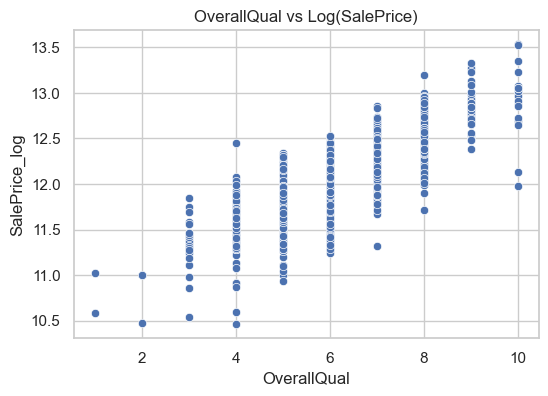

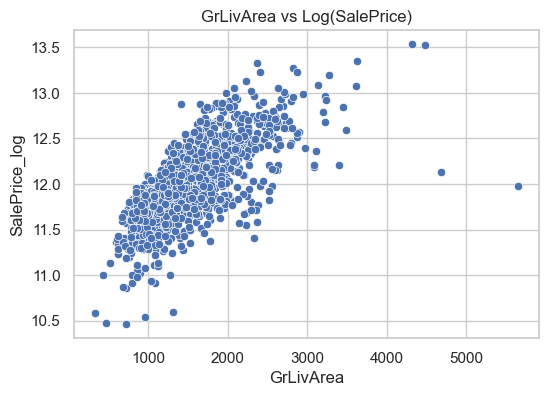

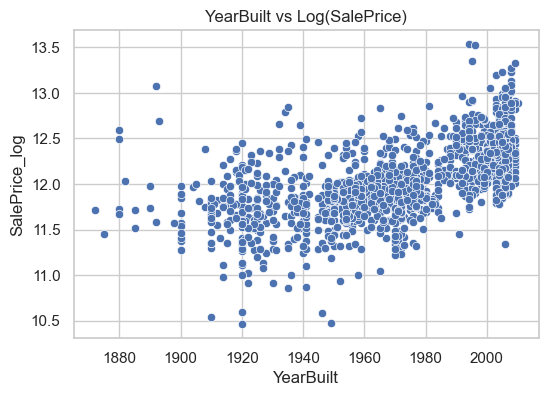

In [13]:
important = ['OverallQual', 'GrLivArea', 'YearBuilt']

for col in important:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df['SalePrice_log'])
    plt.title(f"{col} vs Log(SalePrice)")
    plt.show()


Observations:
- OverallQual has strong positive relationship
- GrLivArea shows linear trend with log price
- YearBuilt shows newer houses are priced higher
